# Movie Success EDA by Wesley Giles

## Import necessary modules and environment variables

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
load_dotenv()

True

## Import data

In [2]:
df = pd.read_csv("./data/tmdb_results_combined.csv.gz")
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,title,region,language,types,attributes,isOriginalTitle,budget,imdb_id,revenue,rating
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance",6.4,...,Kate and Leopold,US,NaN,NaN,alternative spelling,0,48000000.0,tt0035423,76019048.0,PG-13
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance",6.4,...,Kate & Leopold,US,NaN,imdbDisplay,NaN,0,48000000.0,tt0035423,76019048.0,PG-13
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama,6.4,...,The Tango of the Widower and Its Distorting Mi...,US,NaN,imdbDisplay,NaN,0,0.0,tt0062336,0.0,NaN
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama,6.7,...,The Other Side of the Wind,US,NaN,imdbDisplay,NaN,0,12000000.0,tt0069049,0.0,R
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi",5.2,...,Attack of the B-Movie Monster,US,NaN,working,NaN,0,350000.0,tt0088751,0.0,NaN


## Analysis

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)

In [3]:
val_filter = (df["budget"] + df["revenue"]) > 0
len(df[val_filter]["tconst"].unique())

13641

We have 13641 unique titles which have some financial data available

In [4]:
df2 = df.drop(df[df["budget"] == 0].index).copy()
df2.drop(df2[df2["revenue"] == 0].index, inplace = True)
df2.dropna(subset=["budget","revenue"], inplace= True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980 entries, 0 to 88702
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           7980 non-null   object 
 1   titleType        7980 non-null   object 
 2   primaryTitle     7980 non-null   object 
 3   originalTitle    7980 non-null   object 
 4   isAdult          7980 non-null   int64  
 5   startYear        7980 non-null   int64  
 6   endYear          0 non-null      float64
 7   runtimeMinutes   7980 non-null   int64  
 8   genres           7980 non-null   object 
 9   averageRating    7968 non-null   float64
 10  numVotes         7968 non-null   float64
 11  ordering         7980 non-null   int64  
 12  title            7980 non-null   object 
 13  region           7980 non-null   object 
 14  language         190 non-null    object 
 15  types            6807 non-null   object 
 16  attributes       960 non-null    object 
 17  isOriginalTit

In [5]:
df2["rating"].unique()
df2.loc[df2["rating"] == "R ","rating"] = "R"

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

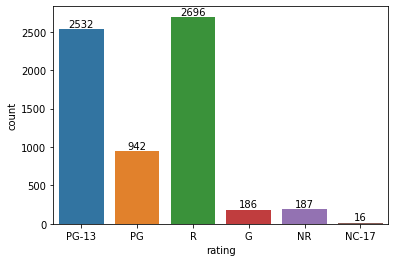

In [6]:
ax = sns.countplot(data = df2, x = "rating" )
ax.bar_label(ax.containers[0]);

We can see that the majority of the movies are rated R, with the next largest rated PG-13

### What is the average revenue per certification category

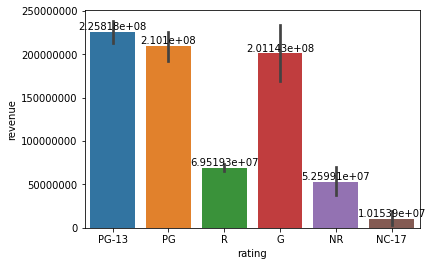

In [7]:
ax = sns.barplot(data = df2, x="rating", y = "revenue")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0]);

In [8]:
data = {}
for rating in df2["rating"].unique():
  if type(rating) == str:
    data[rating] = df2.loc[df2["rating"] == rating,"revenue"].mean()

rev_df = pd.DataFrame.from_dict({"Rating":data.keys(),"Revenue":data.values()})
rev_df

,Rating,Revenue
0,PG-13,2.258175e+08
1,PG,2.100995e+08
2,R,6.951932e+07
3,G,2.011430e+08
4,NR,5.259905e+07
5,NC-17,1.015392e+07


Here we can see the  highest average revenue belonged to PG-13 movies, with PG and G rated movies having only slightly less revenue

### What is the average budget per certification category?

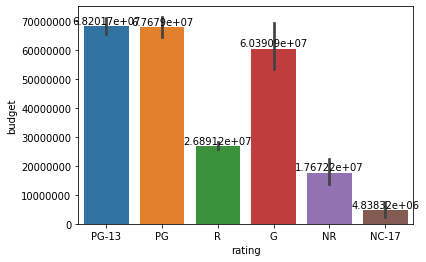

In [9]:
ax = sns.barplot(data = df2, x="rating", y = "budget")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0]);

In [10]:
data = {}
for rating in df2["rating"].unique():
  if type(rating) == str:
    data[rating] = df2.loc[df2["rating"] == rating,"budget"].mean()

bud_df = pd.DataFrame.from_dict({"Rating":data.keys(),"Budget":data.values()})
bud_df

,Rating,Budget
0,PG-13,6.820172e+07
1,PG,6.767897e+07
2,R,2.689122e+07
3,G,6.039090e+07
4,NR,1.767225e+07
5,NC-17,4.838316e+06


Here we can see that PG-13 films also spend the most followed by PG and then G

### What is the average profit margin between rating categories

In [11]:
df2["profit"] = df2["revenue"] - df2["budget"]
df2["profit_percent"] = df2["revenue"] / df2["budget"] - 1

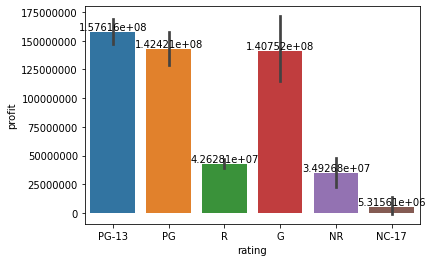

In [12]:
ax = sns.barplot(data = df2, x="rating", y = "profit")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0]);

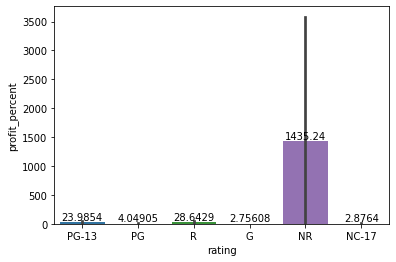

In [13]:
ax = sns.barplot(data = df2, x="rating", y = "profit_percent")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0]);

NR seems to have some serious outliers, so let's ignore that rating for this question

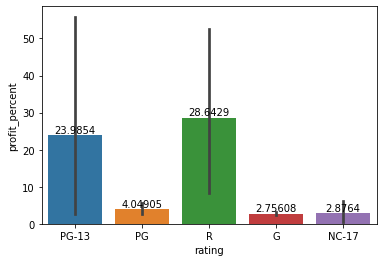

In [15]:
ax = sns.barplot(data = df2[df2["rating"]!="NR"], x="rating", y = "profit_percent")
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0]);

These results show us that PG-13 movies are the most profitable on average, with R rated movies having a higher average ROI. That being said, the PG-13 movies have a higher max ROI.